<img src="https://uwe-cyber.github.io/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
## Portfolio Assignment: Part 3
### Academic year: 2023-24

## Conduct a security investigation into a suspected insider threat
---

**UWEtech** are calling you back once more to help them with their security challenges. They believe that one of their employees has been the cause of their recent security problems, and they believe they may have an insider threat within the company. They enlist your help to examine employee log activity, to see what behaviours deviate from the norm and to identify which user may be acting as a threat to their organisation.

**Dataset:** You will be issued a **unique dataset** based on your UWE student ID. **Failure to use the dataset that corresponds to your student ID will result in zero marks.** Please access the datasets via Blackboard.

**This exercise carries a weight of 45% towards your overall portfolio submission**


### Submission Documents
---

For Part 3 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART3.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for your portfolio submission is **THURSDAY 11th JANUARY @ 14:00**. 

## DATASET: Load in the data

**Please provide the string below that you have been assigned as given in the spreadsheet available on Blackboard. The directory containing your dataset should be at the same location as your notebook file.**

In [2]:
# PLEASE ENTER THE NAME OF THE DATASET ASSIGNED TO YOU AS INDICATED ON BLACKBOARD
DATASET = 'uwetech-dataset01'

### Function for loading data - do not change

In [3]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime

def load_data(DATASET):
    dataset_list = ['uwetech-dataset01', 'uwetech-dataset02', 'uwetech-dataset03', 'uwetech-dataset04']
    if DATASET in dataset_list:
        email_data = pd.read_csv('./' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
        file_data = pd.read_csv('./' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
        web_data = pd.read_csv('./' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
        login_data = pd.read_csv('./' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
        usb_data = pd.read_csv('./' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
        employee_data = pd.read_csv('./' + DATASET + '/employee_data.csv', index_col=0)
        
        email_data['datetime'] = pd.to_datetime(email_data['datetime'])
        file_data['datetime'] = pd.to_datetime(file_data['datetime'])
        web_data['datetime'] = pd.to_datetime(web_data['datetime'])
        login_data['datetime'] = pd.to_datetime(login_data['datetime'])
        usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
    else:
        print ("DATASET variable not defined - please refer to Blackboard for DATASET name")
        return
    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data(DATASET)

C:\Users\Beast\AppData\Local\Temp\ipykernel_7852\3678823198.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  email_data = pd.read_csv('./' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
C:\Users\Beast\AppData\Local\Temp\ipykernel_7852\3678823198.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  file_data = pd.read_csv('./' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
C:\Users\Beast\AppData\Local\Temp\ipykernel_7852\3678823198.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  web_data = pd.read_csv('./' + DATASET + '/web_data.csv', pa

### The following code samples may be useful to aid your investigation

In [4]:
# This shows the employee_data DataFrame
employee_data

user      role                email     pc
0    usr-uda  Security  usr-uda@uwetech.com    pc0
1    usr-hhe  Security  usr-hhe@uwetech.com    pc1
2    usr-vxr   Finance  usr-vxr@uwetech.com    pc2
3    usr-nba   Finance  usr-nba@uwetech.com    pc3
4    usr-hqt   Finance  usr-hqt@uwetech.com    pc4
..       ...       ...                  ...    ...
245  usr-jwo   Finance  usr-jwo@uwetech.com  pc245
246  usr-hiz  Security  usr-hiz@uwetech.com  pc246
247  usr-svz  Services  usr-svz@uwetech.com  pc247
248  usr-ndr        HR  usr-ndr@uwetech.com  pc248
249  usr-eie   Finance  usr-eie@uwetech.com  pc249

[250 rows x 4 columns]

In [5]:
# This shows the login_data DataFrame
login_data

datetime     user  action     pc
0      2022-01-01 00:00:30  usr-lfl   login   pc18
1      2022-01-01 00:09:21  usr-vul   login   pc54
2      2022-01-01 00:14:04  usr-jmr   login  pc137
3      2022-01-01 00:15:06  usr-hvd   login  pc110
4      2022-01-01 00:15:57  usr-ebj   login  pc108
...                    ...      ...     ...    ...
151995 2022-10-31 23:40:34  usr-bsx  logoff   pc79
151996 2022-10-31 23:41:08  usr-gvw  logoff   pc87
151997 2022-10-31 23:43:11  usr-hfz  logoff  pc112
151998 2022-10-31 23:46:29  usr-dmi  logoff   pc17
151999 2022-10-31 23:57:44  usr-ypo  logoff  pc203

[152000 rows x 4 columns]

In [6]:
# This shows how to filter the login_data DataFrame by a particular username
login_data[login_data['user']=='usr-nic']

datetime     user  action     pc
36     2022-01-01 03:05:21  usr-nic   login  pc181
458    2022-01-01 20:50:55  usr-nic  logoff  pc181
510    2022-01-02 00:55:34  usr-nic   login  pc181
963    2022-01-02 21:17:28  usr-nic  logoff  pc181
1122   2022-01-03 06:46:55  usr-nic   login  pc181
...                    ...      ...     ...    ...
150987 2022-10-29 23:00:00  usr-nic  logoff  pc181
151247 2022-10-30 10:52:27  usr-nic   login  pc181
151473 2022-10-30 21:50:44  usr-nic  logoff  pc181
151502 2022-10-31 00:14:21  usr-nic   login  pc181
151961 2022-10-31 21:09:44  usr-nic  logoff  pc181

[608 rows x 4 columns]

In [7]:
# This shows how to filter the login_data DataFrame by a particular set of usernames within a list
login_data[login_data['user'].isin(['usr-nic'])]

datetime     user  action     pc
36     2022-01-01 03:05:21  usr-nic   login  pc181
458    2022-01-01 20:50:55  usr-nic  logoff  pc181
510    2022-01-02 00:55:34  usr-nic   login  pc181
963    2022-01-02 21:17:28  usr-nic  logoff  pc181
1122   2022-01-03 06:46:55  usr-nic   login  pc181
...                    ...      ...     ...    ...
150987 2022-10-29 23:00:00  usr-nic  logoff  pc181
151247 2022-10-30 10:52:27  usr-nic   login  pc181
151473 2022-10-30 21:50:44  usr-nic  logoff  pc181
151502 2022-10-31 00:14:21  usr-nic   login  pc181
151961 2022-10-31 21:09:44  usr-nic  logoff  pc181

[608 rows x 4 columns]

In [8]:
# all_roles is an array/list of all job roles that are within our DataFrame
all_roles = employee_data['role'].unique()
all_roles

array(['Security', 'Finance', 'Legal', 'HR', 'Services', 'Technical',
       'Director'], dtype=object)

In [9]:
### This sample code helps to create two dictionary objects - user_set and user_set_emails - that group usernames and emails by job role.

user_set = {}
user_set_emails = {}
all_roles = employee_data['role'].unique()
for role in all_roles:
    user_set[role] = list(employee_data[employee_data['role'] == role]['user'].values)
    user_set_emails[role] = list(employee_data[employee_data['role'] == role]['email'].values)

In [10]:
# List all usernames that belong to the job role Finance
user_set['Finance']

['usr-vxr',
 'usr-nba',
 'usr-hqt',
 'usr-gyk',
 'usr-tiz',
 'usr-eqp',
 'usr-avx',
 'usr-zjh',
 'usr-hsh',
 'usr-gro',
 'usr-xkb',
 'usr-qcf',
 'usr-zuq',
 'usr-rjv',
 'usr-wer',
 'usr-sgi',
 'usr-utk',
 'usr-zge',
 'usr-inp',
 'usr-ssv',
 'usr-lhu',
 'usr-uby',
 'usr-nvl',
 'usr-vmk',
 'usr-oza',
 'usr-xgk',
 'usr-uyp',
 'usr-jwo',
 'usr-eie']

### Question 1: For all Finance staff members during the month of January, show the distribution of when users logon and logoff by hour using one or more Bar Charts, and report the most common login and logoff time for this role.

*Hint: Once you have filtered the data to only Finance staff in January, count the number of logons and logoffs that occur in each hour of the day.*

#### (1 mark)

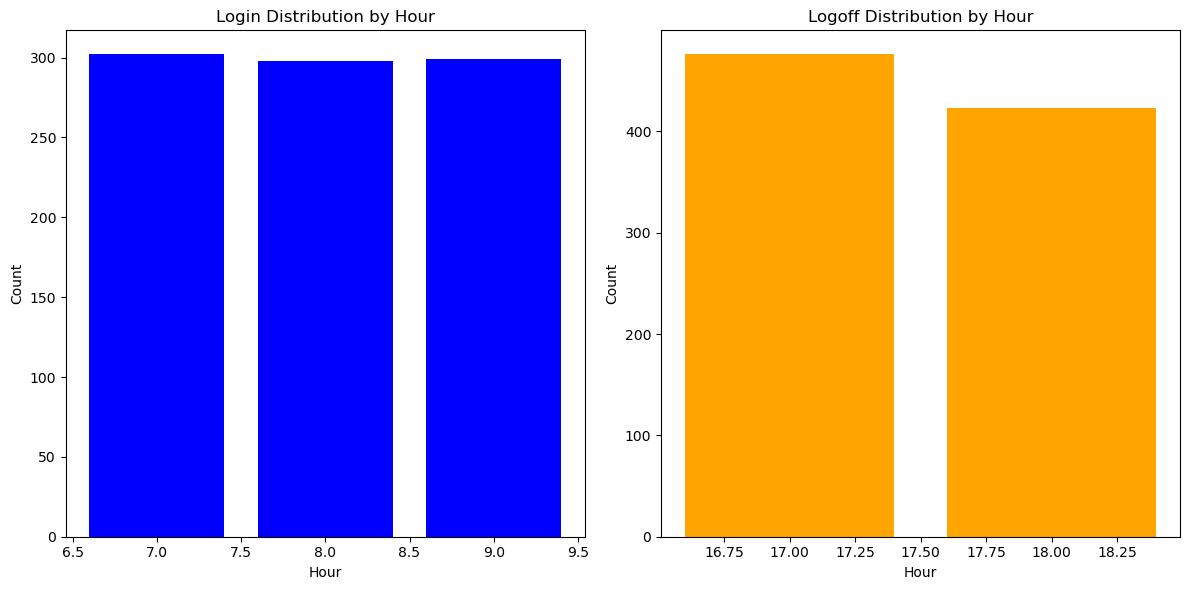

Most common login time: 07:08:20
Most common logoff time: 18:19:02


In [11]:
import pandas as pd
import matplotlib.pyplot as plt


# Merging the two DataFrames on the 'user' column
merged_data = pd.merge(login_data, employee_data, on='user')

# Converting 'datetime' to datetime with the specified format
merged_data['datetime'] = pd.to_datetime(merged_data['datetime'], format='%Y-%m-%d %H:%M:%S')

# Filting Finance staff in January 
finance_january = merged_data[(merged_data['role'] == 'Finance') & (merged_data['datetime'].dt.month == 1)].copy()

# Extracting hour 
finance_january['Hour'] = finance_january['datetime'].dt.hour

# Counting logins and logoffs by hour
login_counts = finance_january[finance_january['action'] == 'login'].groupby('Hour').size()
logoff_counts = finance_january[finance_january['action'] == 'logoff'].groupby('Hour').size()

# Check if login_counts and logoff_counts are not empty before proceeding
if not login_counts.empty and not logoff_counts.empty:
    # Plotting 
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.bar(login_counts.index, login_counts, color='blue')
    plt.title('Login Distribution by Hour') # Title 
    plt.xlabel('Hour') # x axis
    plt.ylabel('Count') # y axis 

    # Plot logoff distribution
    plt.subplot(1, 2, 2)
    plt.bar(logoff_counts.index, logoff_counts, color='orange')
    plt.title('Logoff Distribution by Hour') # title 
    plt.xlabel('Hour') # x axis  
    plt.ylabel('Count') # y axis 

    plt.tight_layout()
    plt.show()

    # Most common login and logoff times
    most_common_login_time = finance_january[finance_january['action'] == 'login']['datetime'].mode().iloc[0].strftime('%H:%M:%S')
    most_common_logoff_time = finance_january[finance_january['action'] == 'logoff']['datetime'].mode().iloc[0].strftime('%H:%M:%S')

    print(f"Most common login time: {most_common_login_time}") # print most common login time 
    print(f"Most common logoff time: {most_common_logoff_time}") # print most common log off time 
else:
    if login_counts.empty:
        print("No login entries for Finance staff in January.")
        print("login_counts:")
        print(login_counts)
    if logoff_counts.empty:
        print("No logoff entries for Finance staff in January.")
        print("logoff_counts:")
        print(logoff_counts)


### Question 2: Plot a multi-line chart that shows the logon and logoff times during the month of January for the user of pc42.

*Hint: Filter the data as you need, and make two calls to plt.plot().*

#### (1 mark)



C:\Users\Beast\AppData\Local\Temp\ipykernel_7852\386306298.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  login_entries['hour'] = login_entries['datetime'].dt.hour
C:\Users\Beast\AppData\Local\Temp\ipykernel_7852\386306298.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logoff_entries['hour'] = logoff_entries['datetime'].dt.hour


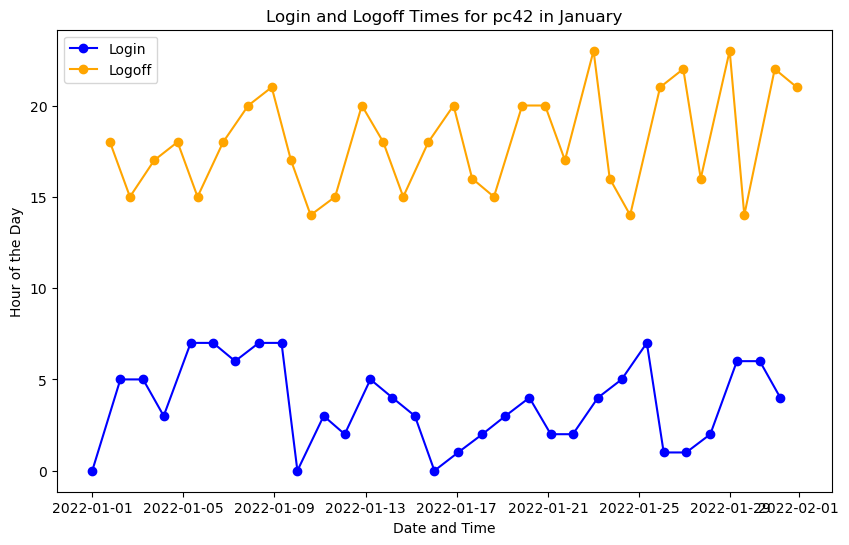

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


# Filtering login_data for pc42
pc42_login_data = login_data[login_data['pc'] == 'pc42']

# Merging the two DataFrames on the 'user' column
merged_data = pd.merge(pc42_login_data, employee_data, on='user')

# Converting 'datetime' to datetime with the specified format
merged_data['datetime'] = pd.to_datetime(merged_data['datetime'], format='%Y-%m-%d %H:%M:%S')

# Filtering entries for pc42 in January
pc42_january = merged_data[(merged_data['role'] == 'Security') & (merged_data['datetime'].dt.month == 1)]

# Separate login and logoff entries
login_entries = pc42_january[pc42_january['action'] == 'login']
logoff_entries = pc42_january[pc42_january['action'] == 'logoff']

# Extracting  hour 
login_entries['hour'] = login_entries['datetime'].dt.hour
logoff_entries['hour'] = logoff_entries['datetime'].dt.hour

# Plot multi-line chart
plt.figure(figsize=(10, 6))
plt.plot(login_entries['datetime'], login_entries['hour'], label='Login', marker='o', linestyle='-', color='blue')
plt.plot(logoff_entries['datetime'], logoff_entries['hour'], label='Logoff', marker='o', linestyle='-', color='orange')

plt.title('Login and Logoff Times for pc42 in January') # title 
plt.xlabel('Date and Time') # x axis 
plt.ylabel('Hour of the Day') # y label 
plt.legend()
plt.show()


### Question 3: Use a node-link graph to show all emails sent by Security staff on January 5th 2022. Your node link graph may show only those users who receive emails from the select senders.

*Hint: Filter the data and then refer back to Question 4 from Part 1 to format the data correctly*

#### (1 mark)

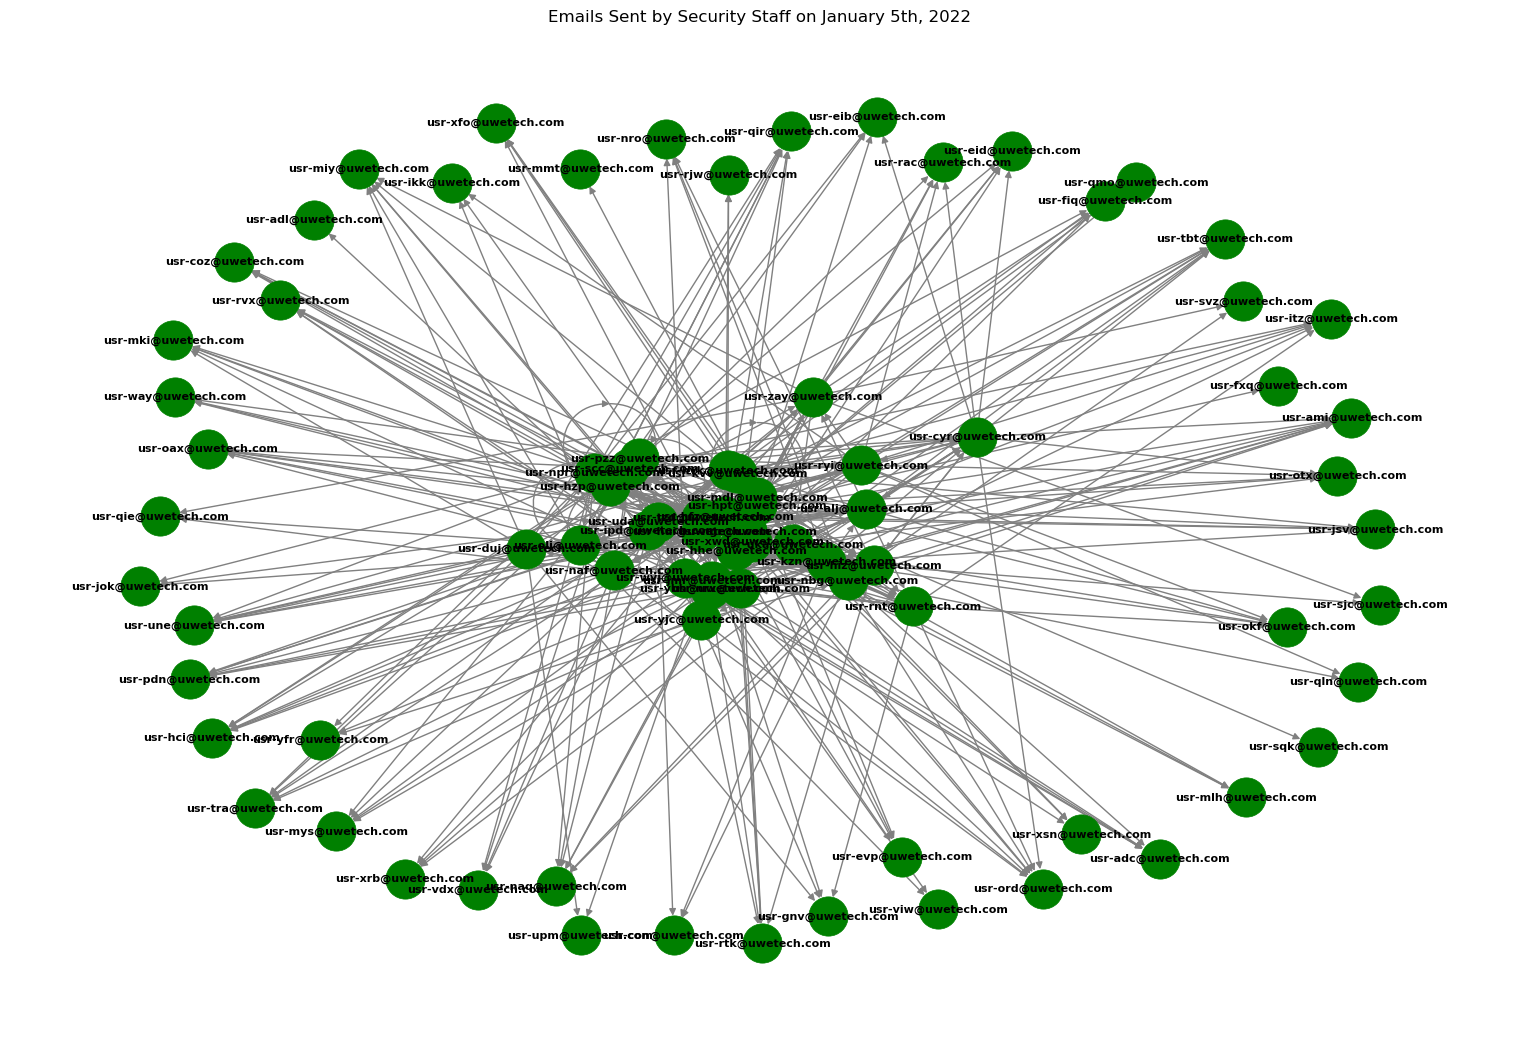

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Filtering through employees with the role 'Security'
security_employees = employee_data[employee_data['role'] == 'Security']

# Converting  'datetime' column to string
email_data['datetime'] = pd.to_datetime(email_data['datetime']).dt.strftime('%Y-%m-%d')

# Filtering  emails sent on January 5th, 2022
filtered_emails = email_data[email_data['datetime'].str.startswith('2022-01-05')]

# Filtering emails sent by Security staff
security_emails_jan5 = filtered_emails[filtered_emails['sender'].isin(security_employees['email'])]

# Create a gnode link graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in security_emails_jan5.iterrows():
    G.add_node(row['sender'])
    G.add_node(row['recipient'])
    G.add_edge(row['sender'], row['recipient'])

# Draw the graph with customized plot settings
pos = nx.spring_layout(G, seed=42, k=0.3)  # Experimenting to try spread output so its easier to read.
plt.figure(figsize=(15, 10))  # Increase figure size
nx.draw(G, pos, with_labels=True, node_color='green', node_size=800, font_size=8, font_color='black', font_weight='bold', edge_color='gray', linewidths=0.5)


plt.title('Emails Sent by Security Staff on January 5th, 2022') # title
plt.show()


### (Advanced) Question 4: Extend the above, now showing a node for every possible user. The edge connections should be as above, for emails sent by Security staff on 5th January 2022. You should use a shell layout for your network plot.

*Hint: Think about how to include all users as nodes. You may even include a dummy node and remove this in your processing depending on how you form your edgelist - https://networkx.org/documentation/stable/index.html*

#### (3 marks)

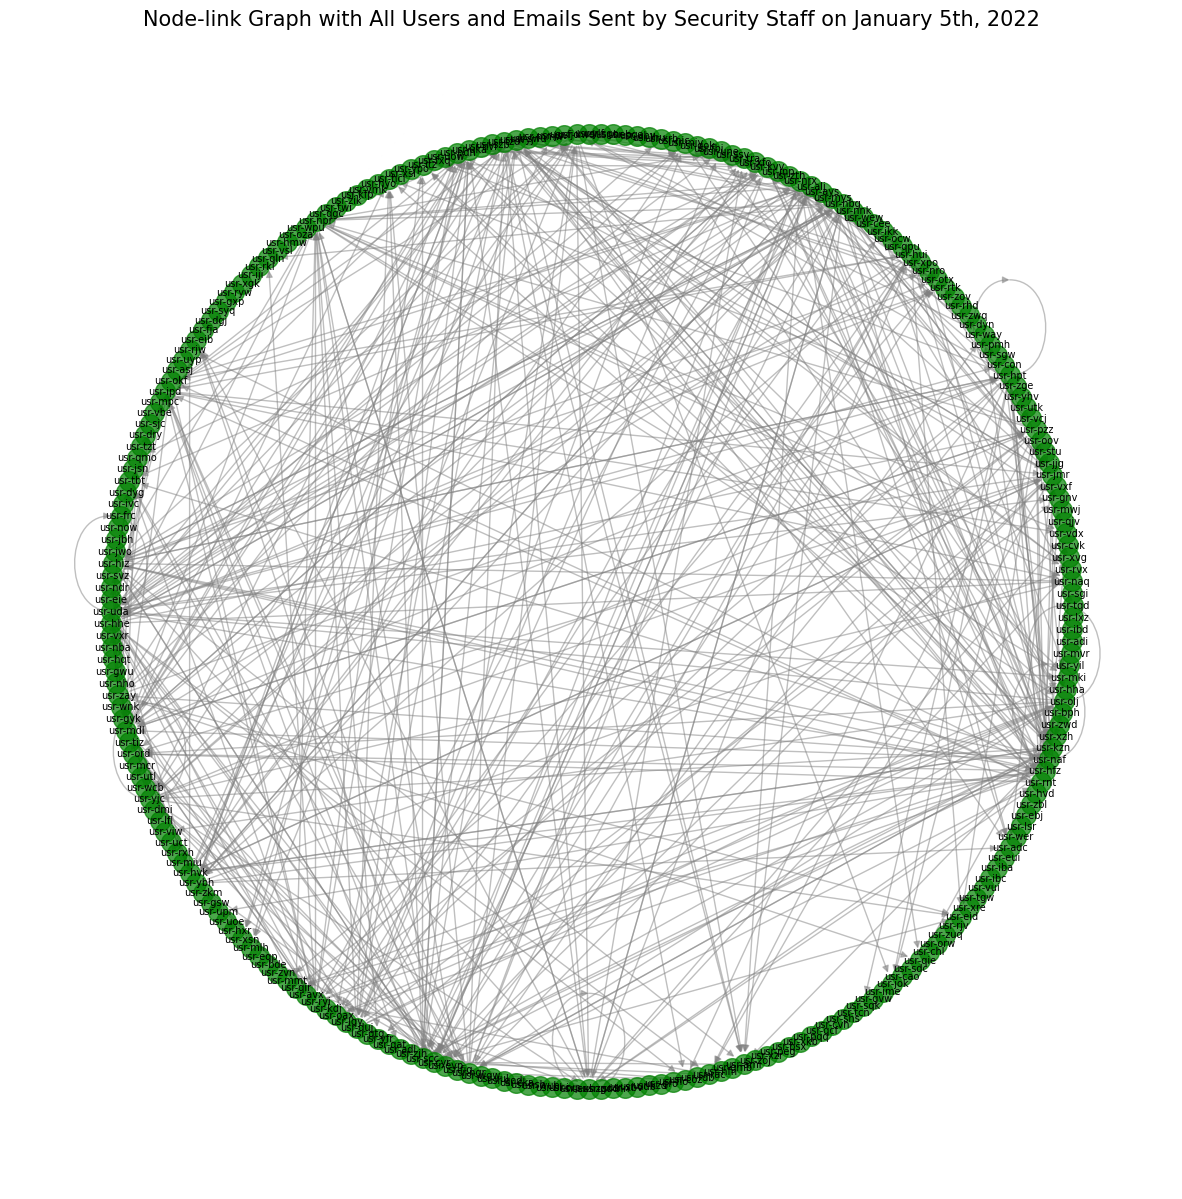

A total of 437 emails were sent by Security staff on January 5th, 2022.


In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Converting 'datetime' column to datetime
email_data['datetime'] = pd.to_datetime(email_data['datetime'])

# Filtering for Security staff emails
security_staff_emails = employee_data[employee_data['role'] == 'Security']['email'].unique()

# Filtering for emails sent on January 5th, 2022 by Security staff
security_emails_on_jan_5 = email_data[
    (email_data['datetime'].dt.date == pd.to_datetime('2022-01-05').date()) &
    (email_data['sender'].isin(security_staff_emails))
]

# Create the graph
G = nx.DiGraph()

# Adding nodes for every user in the employee_data
all_users = employee_data['user'].unique()
G.add_nodes_from(all_users)

# Adding links from sender to recipient for emails sent by Security staff on January 5th.
for _, row in security_emails_on_jan_5.iterrows():
    sender = row['sender'].split('@')[0]
    recipient = row['recipient'].split('@')[0]
    G.add_edge(sender, recipient)

# Drawing the graph
plt.figure(figsize=(15, 15))
pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='green', alpha=0.7)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=7, font_color='black')


plt.title('Node-link Graph with All Users and Emails Sent by Security Staff on January 5th, 2022', size=15) # Title
plt.axis('off')
plt.show()

# Output the message below the graph to show the amount of emails sent or if none were sent.
if len(G.edges) == 0:
    print("No emails were sent by Security staff on January 5th, 2022.")
else:
    print(f"A total of {len(G.edges)} emails were sent by Security staff on January 5th, 2022.")


### Question 5: Show a comparison between the files accessed by HR staff, Services staff, and Security staff, during January. You will need to think of a suitable way to convey this information within a single plot so that comparison of activity can be made easily.

*Hint: Think which plot enables you to make comparisons between two attributes, and then think what the attributes would need to be for mapping three job roles against the possible set of files accessed.*

#### (4 marks)

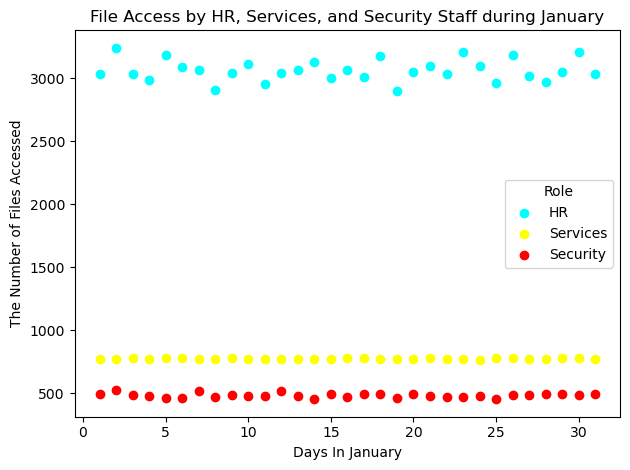

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

file_data['datetime'] = pd.to_datetime(file_data['datetime'])
file_data_january = file_data[file_data['datetime'].dt.month == 1] 
file_data_with_roles = file_data_january.merge(employee_data, on='user', how='left')
roles_of_interest = ['HR', 'Services', 'Security'] # Defining the 3 roles on the chart
file_data_roles = file_data_with_roles[file_data_with_roles['role'].isin(roles_of_interest)]

# Counting  the number of files accessed by each role on each day
file_access_counts = file_data_roles.groupby(['role', file_data_roles['datetime'].dt.day])['filename'].count().unstack(fill_value=0)

# Making the scatter plot
days = file_access_counts.columns
colors = {'HR': '#00FFFF', 'Services': '#FFFF00', 'Security': '#FF0000'}  # Adding the colours

for role in roles_of_interest:
    plt.scatter(days, file_access_counts.loc[role], label=role, color=colors[role])

plt.title('File Access by HR, Services, and Security Staff during January') # title 
plt.xlabel('Days In January') # X axis title 
plt.ylabel('The Number of Files Accessed') # Y axis title
plt.legend(title='Role') # Roles on the chart
plt.tight_layout()
plt.show()


### Question 6: Carry on your own investigation to find the anomalous activity across all data files provided. Provide clear evidence and justification for your investigative steps.

Marks are awarded for: 
- a clear explanation of the steps you take to complete your investigation (5)
- suitable use of data analysis with clear explanation (6)
- suitable use of visualisation methods with clear annotation (6)
- identifying all of the suspicious events (8)

#### (25 marks)

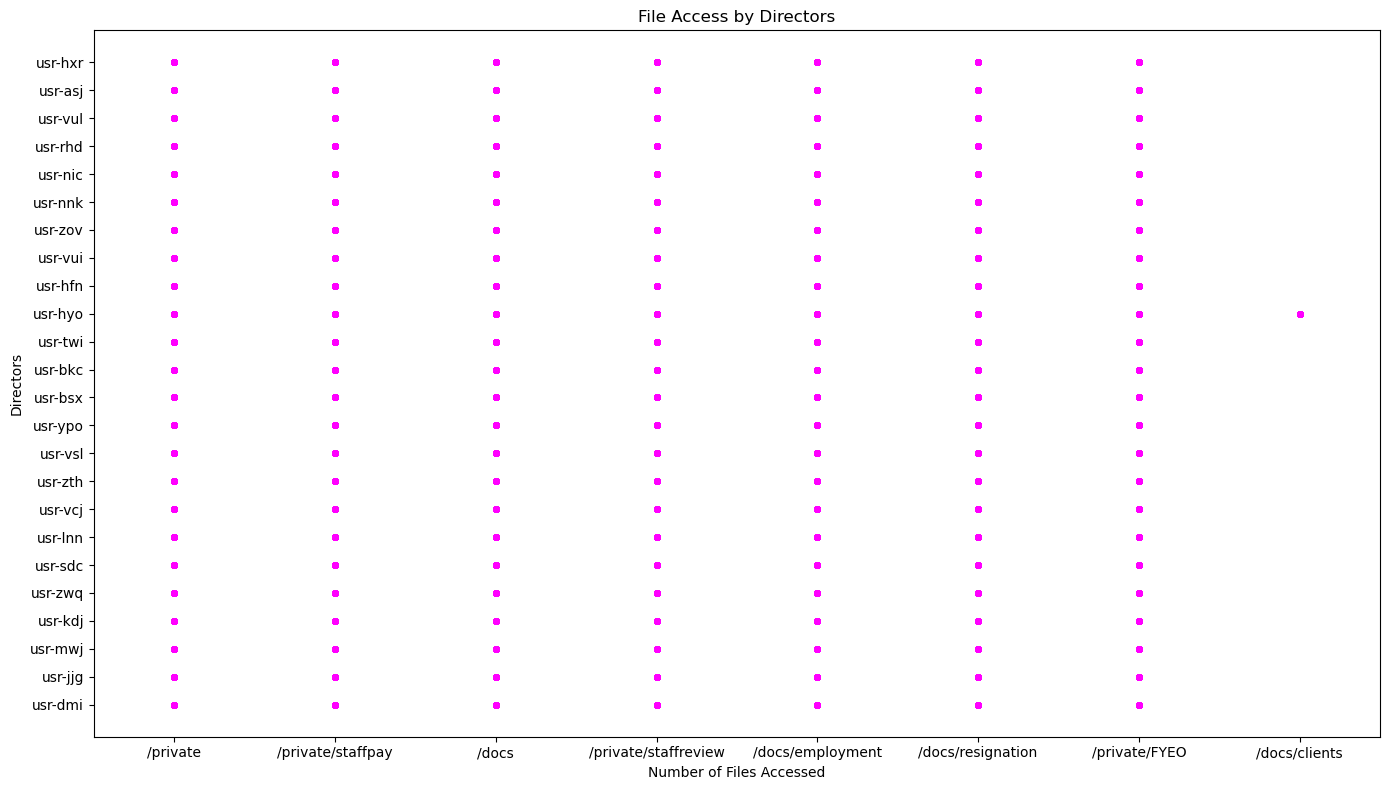

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1 - Grabbing each staff type from the employee_data file and merging it with file data. This allows us to see
# which exact staff has accessed which kind of file. Its important to check for this as users may be accessing
# specific files in which they should not be accessing. 

director_data = employee_data[employee_data['role'] == 'Director'] # grabbing the Directors from 'role' 

# Merge file_data with director_data on the 'user' column
file_data_with_directors = file_data.merge(director_data, on='user', how='inner')

# Use Seaborn for the scatter plot with jitter to make the dots clearer to see. 
plt.figure(figsize=(14, 8))
sns.stripplot(x='filename', y='user', data=file_data_with_directors, jitter=False, color='#FF00FF')

plt.title('File Access by Directors') # Title
plt.xlabel('Number of Files Accessed') # X axis 
plt.ylabel('Directors') # Y axis
plt.tight_layout()
plt.show()


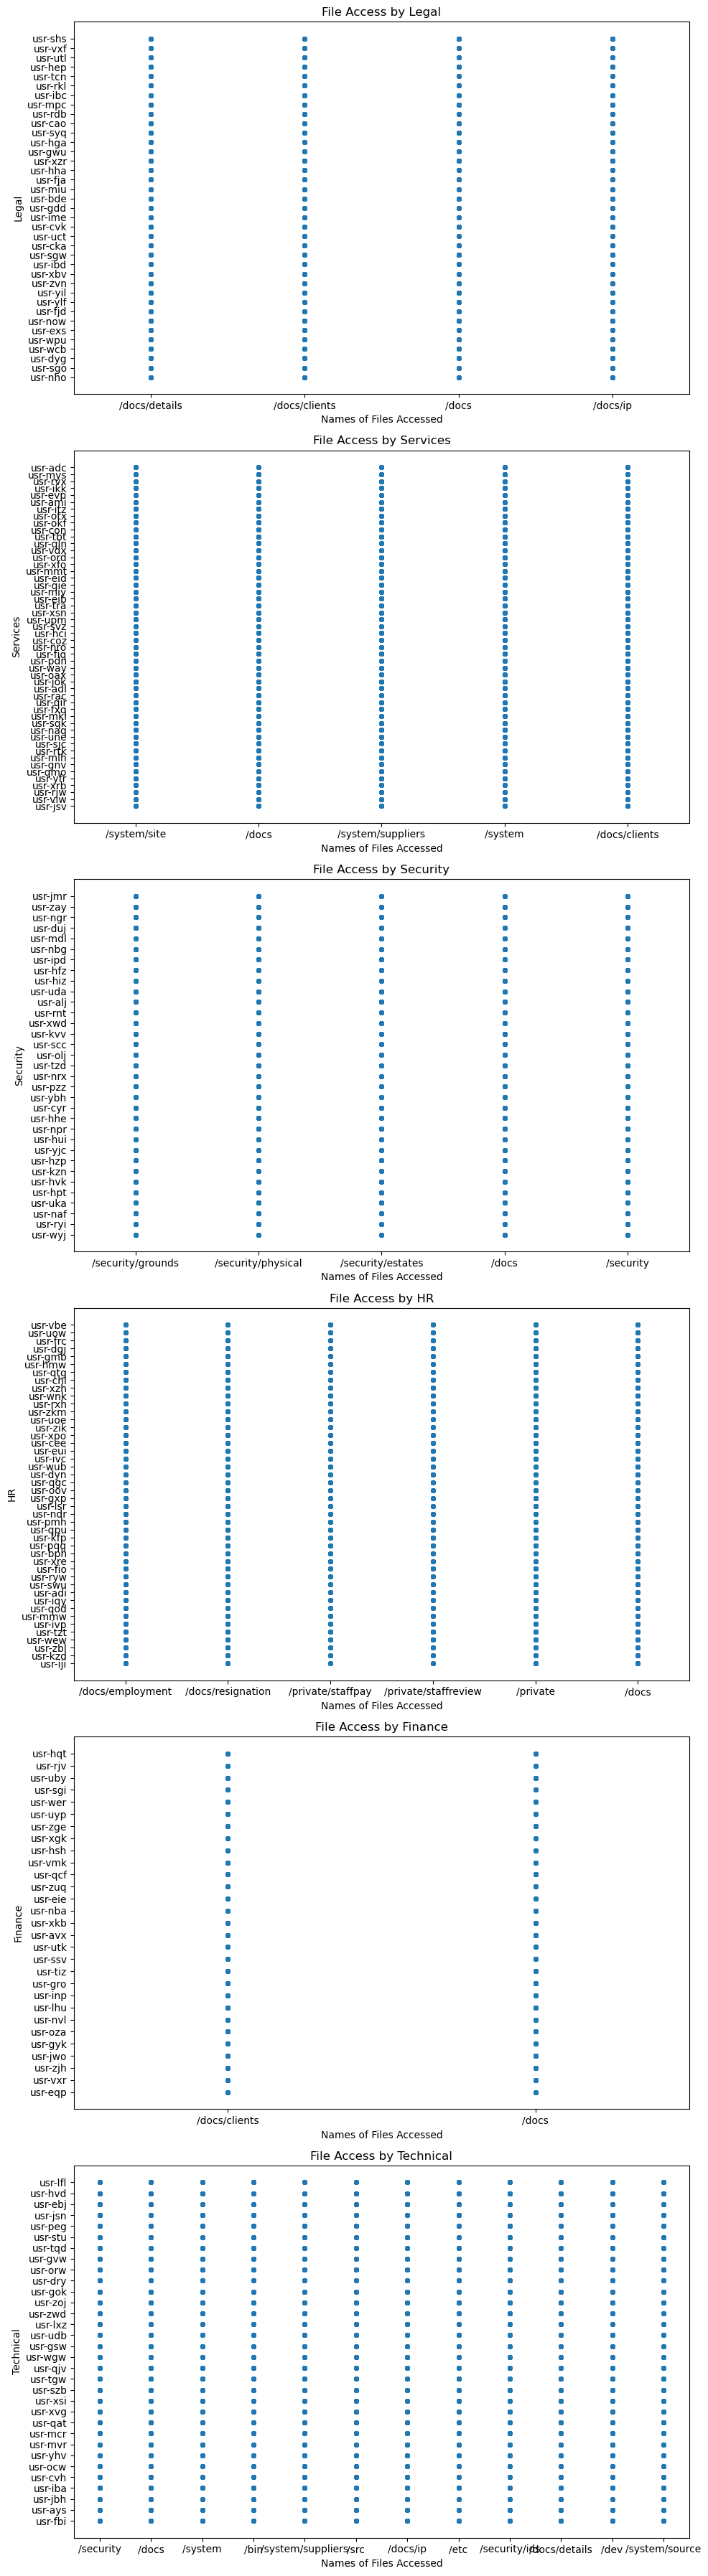

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2 - Now we do the same for every other role, as previously we only did Director
# so now we do the remaining other 6 staff members. 

roles_of_interest = ['Legal', 'Services', 'Security', 'HR', 'Finance', 'Technical'] # Selecting the other roles we need.

# Creating a scatter plot with subplots for each role
fig, axes = plt.subplots(nrows=len(roles_of_interest), figsize=(10, 6 * len(roles_of_interest)))

# Iterate over each role and create a scatter plot
for i, role in enumerate(roles_of_interest):
    role_data = employee_data[employee_data['role'] == role]
    file_data_with_role = file_data.merge(role_data, on='user', how='inner')

    sns.stripplot(ax=axes[i], x='filename', y='user', data=file_data_with_role, jitter=False)
    
    axes[i].set_title(f'File Access by {role}') # Title 
    axes[i].set_xlabel('Names of Files Accessed') # X axis 
    axes[i].set_ylabel(role) # Y axis
plt.tight_layout()
plt.show()


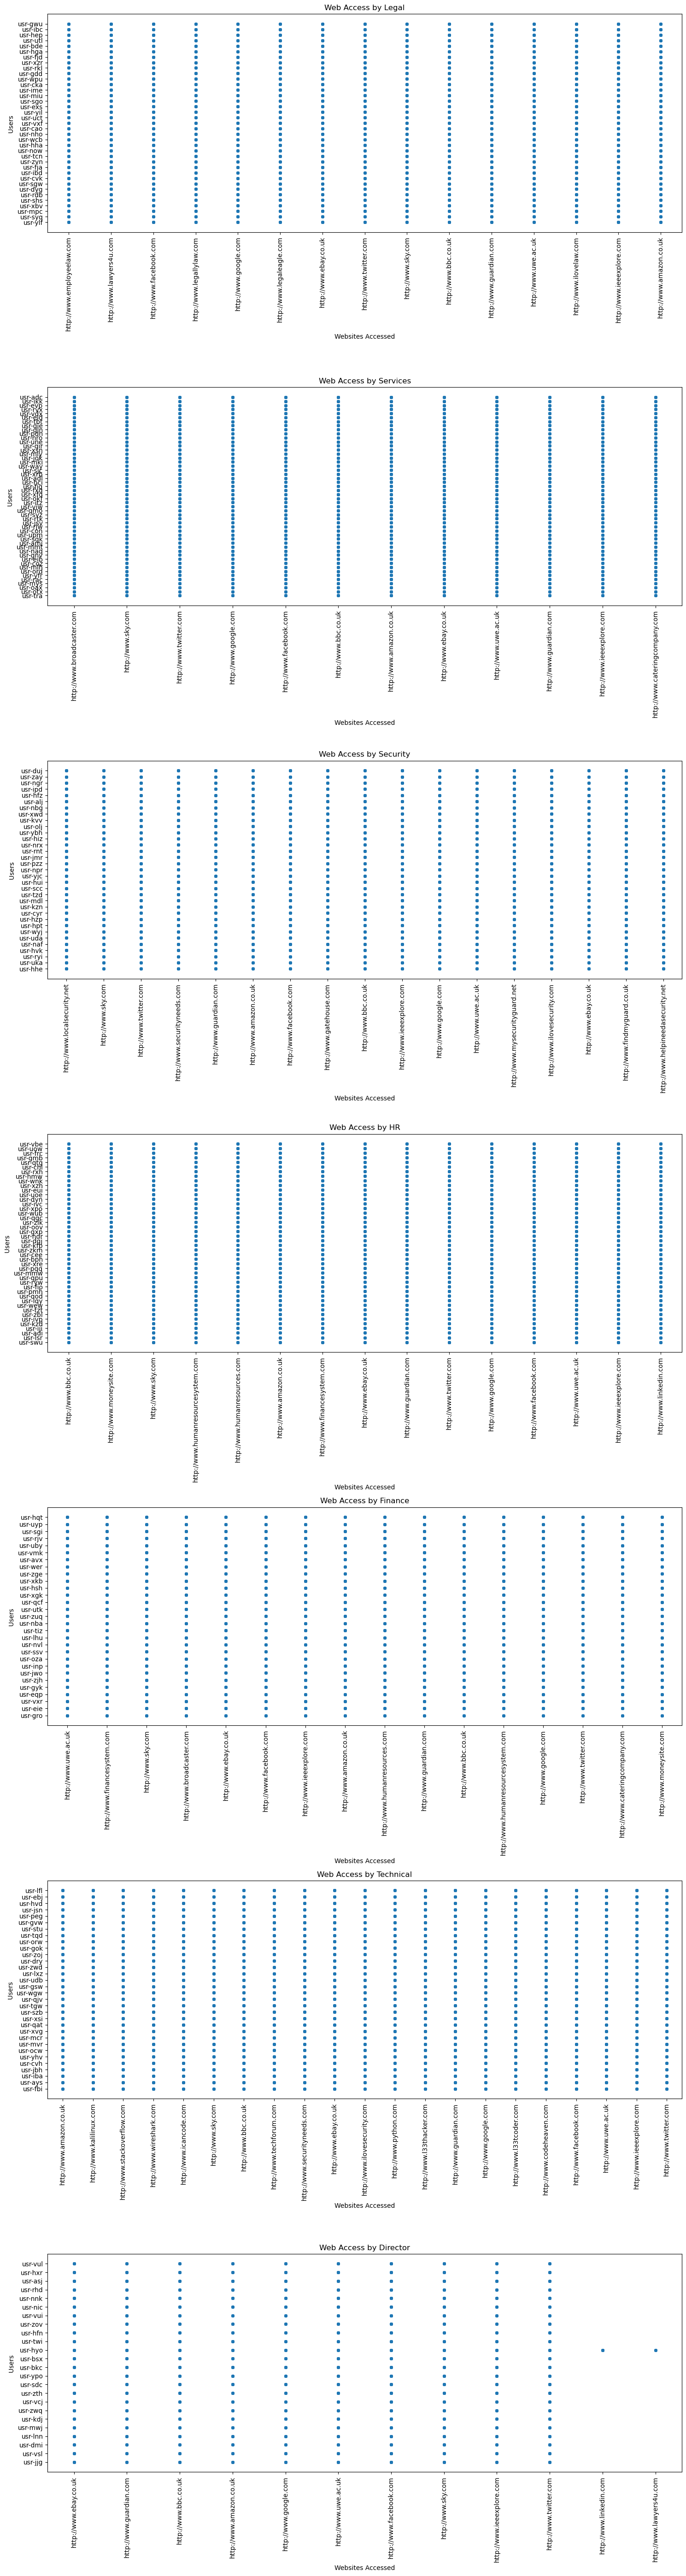

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3, we combine the employee data and web data to see which staff member has been 
# on which specific website. This is important as we can see if theres any 
# anomalies. 

# Selecting which staff members we want 
roles_of_interest = ['Legal', 'Services', 'Security', 'HR', 'Finance', 'Technical', 'Director']

# Create a scatter plot 
fig, axes = plt.subplots(nrows=len(roles_of_interest), figsize=(15, 8 * len(roles_of_interest)))

# Iterate over each role and create a scatter plot
for i, role in enumerate(roles_of_interest):
    role_data = employee_data[employee_data['role'] == role]
    web_data_with_role = web_data.merge(role_data, on='user', how='inner')

    sns.stripplot(ax=axes[i], x='website', y='user', data=web_data_with_role, marker='o', jitter=False)
    
    axes[i].set_title(f'Web Access by {role}') # Title 
    axes[i].set_xlabel('Websites Accessed')  # x axis 
    axes[i].set_ylabel('Users ')  # y axis 
    
    # Rotate x-axis labels by 90 degrees as this makes it a lot easier to write. 
    axes[i].tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()


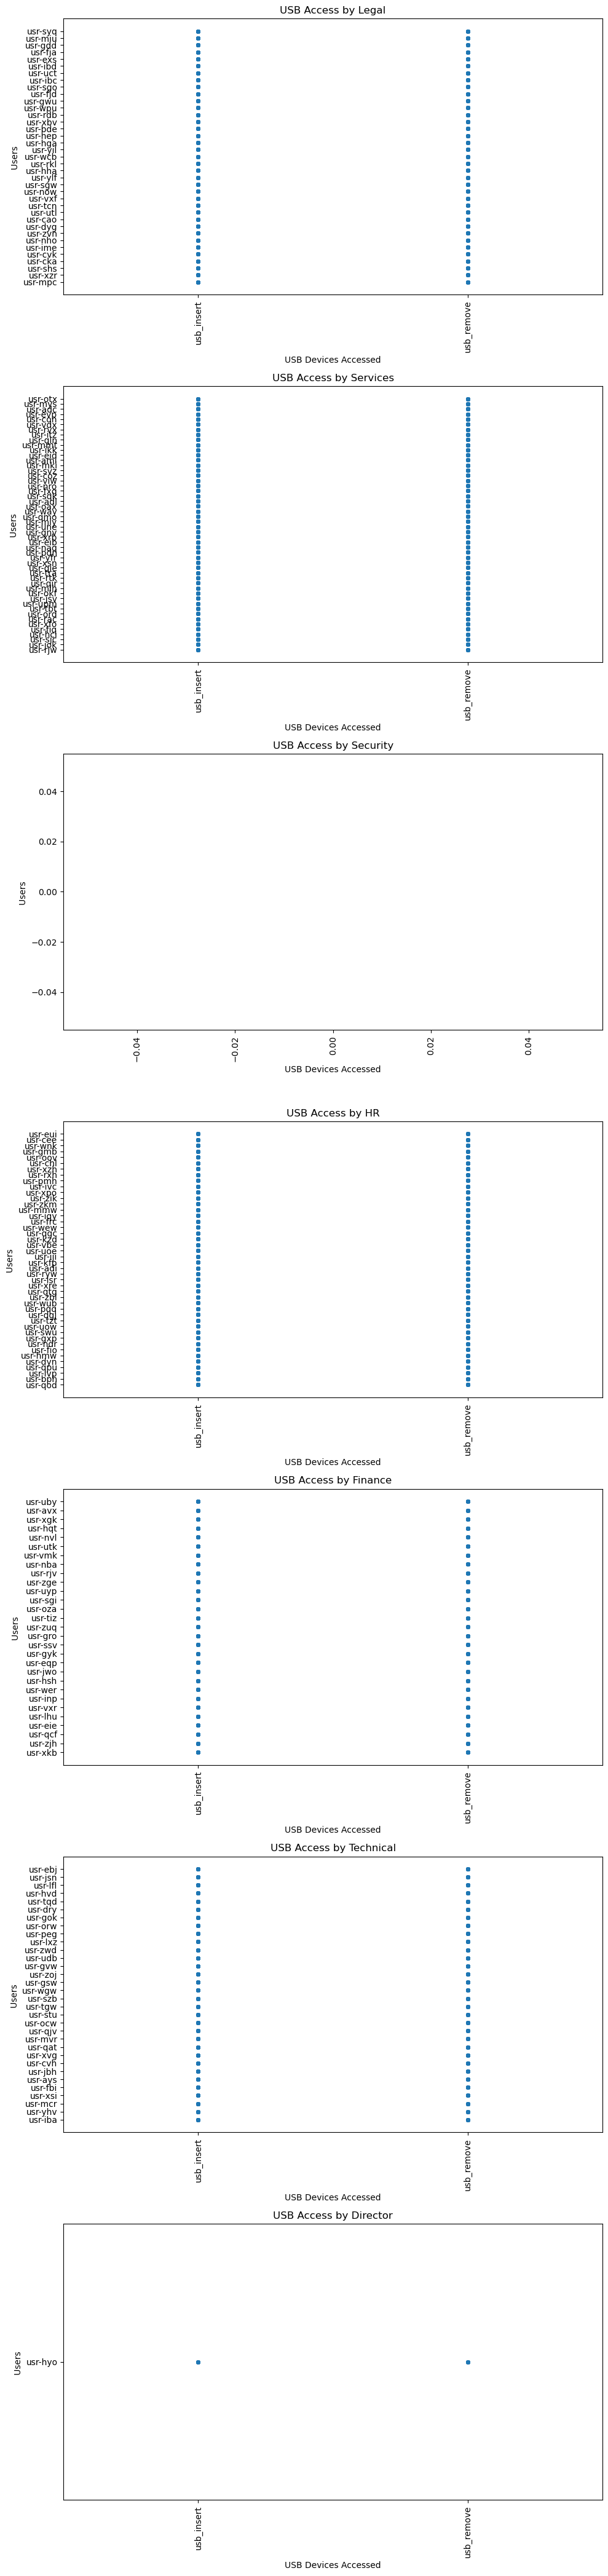

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 4 , we use the employee data and merge with USB data
# to see which users are inserting and removing USB's.
# its important to look for this as malicious activity could 
# be taking place should there be anomlaies in the results. 

# Selecting what roles we want, all in this case.
roles_of_interest = ['Legal', 'Services', 'Security', 'HR', 'Finance', 'Technical', 'Director']

# Create a scatter plot 
fig, axes = plt.subplots(nrows=len(roles_of_interest), figsize=(10, 6 * len(roles_of_interest)))

# Iterate over each role and create a scatter plot
for i, role in enumerate(roles_of_interest):
    role_data = employee_data[employee_data['role'] == role]
    usb_data_with_role = usb_data.merge(role_data, on='user', how='inner')

    sns.stripplot(ax=axes[i], x='action', y='user', data=usb_data_with_role, marker='o', jitter=False)
    
    axes[i].set_title(f'USB Access by {role}') # Title
    axes[i].set_xlabel('USB Devices Accessed')  # X axis 
    axes[i].set_ylabel('Users ')  # Y axis 
    
    # Rotate x-axis labels by 90 degrees to make it easier to see
    axes[i].tick_params(axis='x', rotation=90)

# Adjust spacing between subplots to space it out more - easier to see 
plt.subplots_adjust(hspace=0.5)

plt.tight_layout()
plt.show()


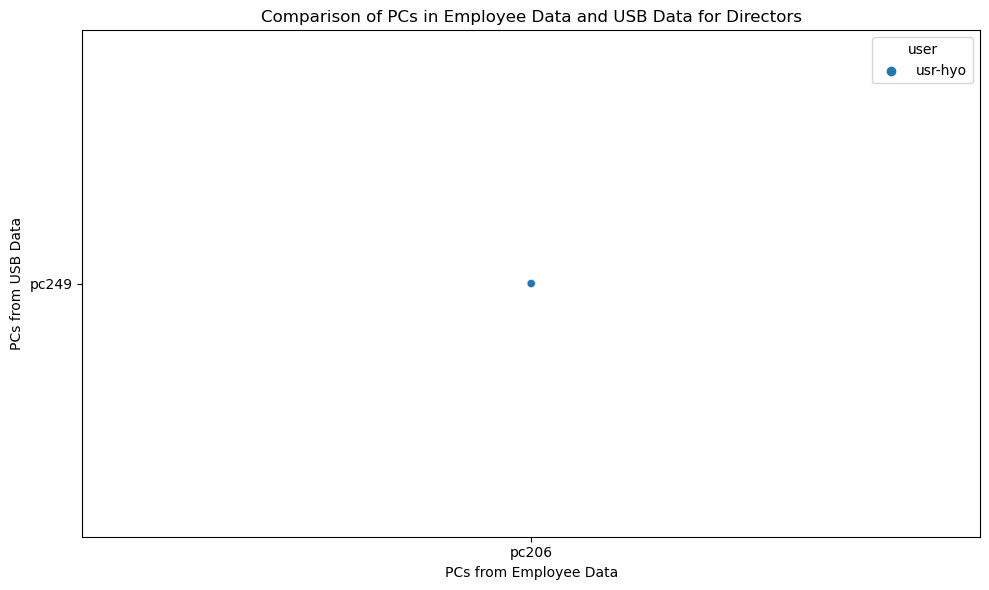

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 5 - Going throught the data sets and the outputs
# it seems like the user 'usr-hyo' seems to be appearing
# frequently as an anomaly. To go into further, knowing
# this user was a Director, I specicfically plotted
# to see any mismatches. To my surprise, the ONLY user
# with a mismatch was 'usr-hyo'



# Selecting specifically Director 
role_of_interest = 'Director'

# Filtering employee_data for the Director role
director_data = employee_data[employee_data['role'] == role_of_interest]

# Merge director_data with usb_data on the 'user' column
merged_data = director_data.merge(usb_data, on='user', how='inner', suffixes=('_employee', '_usb'))

# Convert 'pc' columns to strings
merged_data['pc_employee'] = merged_data['pc_employee'].astype(str)
merged_data['pc_usb'] = merged_data['pc_usb'].astype(str)

# Create a scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pc_employee', y='pc_usb', data=merged_data, marker='o', hue='user', legend='full')

plt.title(f'Comparison of PCs in Employee Data and USB Data for {role_of_interest}s') # Title 
plt.xlabel('PCs from Employee Data') # x axis
plt.ylabel('PCs from USB Data') # y axis

plt.tight_layout()
plt.show()


### Question 7: Describe what you believe are the key findings of your investigation. You should clearly state the suspect identified, and the sequential order of suspicious events, including the date and time that these occurred. You should then provide your own critical reflection of what has occurred in this scenario, giving justification for any assumptions made. Limit your response to a maximum of 400 words. 

Please make clear which dataset you have used for your investigation.

#### (10 marks)

Dataset used : 'dataset01'

A few anomalies were discovered by using several charts. I started by doing a test to find out which employee had access to what kind of file. The user 'usr-hyo' appeared to be the only outlier in the 'Directors' scatterplot. /docs/clients was the file that stood out as the abnormality. It was strange to observe that the only person in directors to have accessed this file was that particular user. After taking note of this, the next inquiry was conducted. This time, I conducted an analysis to find out which websites each kind of user had visited. Once more, 'usr-hyo' appeared to have an irregularity within the directors scatterplot. Two websites that no other person had visited were accessed by them. These include 'http://www.lawyers4u.com' and 'http://www.linkedin.com'. It is highly unusual for a director to have access to a lawyer's website while they are at work. In order to investigate further, I used the usb_data.csv file to find out which people had been utilising USBs. 'usr-hyo' appeared to be the ONLY user who inserted and removed a USB when this was tested for all users and roles. This set off alarms right away. To investigate further, I utilised employee_data.csv and usb_data.csv to compare the PC allocated to 'usr-hyo' in comparison with the PCs used to insert and remove USBs. Surprisingly, there appeared to be a discrepancy. PC 206 was assigned to 'usr-hyo'. Nevertheless, it appears 'usr-hyo' had entered and removed a USB from the PC  which was not assigned to them. 


Ultimately, the thorough examination of numerous charts revealed concerning anomalies related to 'usr-hyo.' In the Directors' scatterplot, there appears to have been an unauthorised retrieval due to the unusual file access to '/docs/clients'. Concerns about security are raised by unusual website visits to "http://www.linkedin.com" and "http://www.lawyers4u.com." Furthermore, the regular use of USBs by 'usr-hyo' on PC 249 (which is allocated to 'usr-ele') suggests possible data transfer. The disparity between the usage on PC 249 and the allocated PC (206) highlights the necessity for 'usr-hyo's' activities to be looked into immediately in order to protect the integrity of the system and to analyse potential data breaches.

